# Proyek Analisis Data: Bike Sharing Dataset

Nama        : Adrian Reynold Ga
Email       : adrian.reynold,.ga@gmail.com
ID Dicoding : driiaaannn

## Pertanyaan Bisnis
1.0 Bagaimana performa penyewaan sepeda dari waktu ke waktu?

2.0 Bagaimana perbandingan performa penyewaan sepeda antara hari kerja dan hari libur?
2.1 Jam berapakah puncak penyewaan sepeda terjadi di hari kerja?

3.0 Bagaimana performa penyewaan sepeda berdasarkan musim? 
3.1 Apakah kondisi cuaca mempengaruhi?

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings # Optional
warnings.simplefilter(action='ignore', category=FutureWarning)

*module warnings hanya untuk menghilangkan 'FutureWarning' dari module Pandas 

## Data Wrangling

### Gathering Data

- Ekspor datadrame dari file CSV

In [2]:
df = pd.read_csv('./data/hour.csv', delimiter=',')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*Hanya menggunakan hour.csv untuk menghindari redundancy data

### Assessing Data

- Melihat informasi setiap 'column' dari dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Memeriksa missing value pada dataframe

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Mengecek baris duplikat pada dataframe

In [5]:
df.duplicated().sum()

np.int64(0)

- Mengecek value dan persebarannya pada dataframe

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Rangkuman Tahapan

- Melakukan pengecekan value menggunakan method yang disediakan Pandas.
- Hasil describe() yang menunjukkan terdapat value yang tidak normal pada beberapa column, seperti; humidity dan windspeed yang memiliki value 0.0.

### Cleaning Data

- Mengeliminasi kolom yang tidak dibutuhkan ('instant', karena hanya sebagai unique identifier; 'holiday', karena akan digantikan kolom 'workingday').
- Mengubah tipe data pada beberapa kolom menjadi 'category'; 'year', 'season', 'month', 'day', 'workday', 'weather'.
- Mengubah tipe data 'date' menjadi datetime.
- Mengganti nama kolom dan kategori agar lebih mudah dibaca.
- Melakukan Imputation pada row yang tidak memiliki data yang lengkap (seperti 'windspeed' dan 'humidity'= 0.0)

- Mengecek nama column pada dataframe

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- Mengubah nama column
- Melakukan concat antara date dan hour 
- Reorder urutan columns
- Menampilkan hasil dari 5 row awal dataframe

In [8]:
df = df[['dteday', 'season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
df.columns = ['date', 'season', 'year', 'month', 'hour', 'day', 'workday', 'weather', 'temperature', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df['datetime'] = df['date'] + ' ' + df['hour'].apply(lambda x: f'{x:02d}') + ':00'

df = df[['datetime', 'date', 'season', 'year', 'month', 'hour', 'day', 'workday', 'weather', 'temperature', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
df = df.drop('date', axis=1)

df.head()

,datetime,season,year,month,hour,day,workday,weather,temperature,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00,1,0,1,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2011-01-01 01:00,1,0,1,1,6,0,1,0.22,0.80,0.0,8,32,40
2,2011-01-01 02:00,1,0,1,2,6,0,1,0.22,0.80,0.0,5,27,32
3,2011-01-01 03:00,1,0,1,3,6,0,1,0.24,0.75,0.0,3,10,13
4,2011-01-01 04:00,1,0,1,4,6,0,1,0.24,0.75,0.0,0,1,1


- Mengubah tipe data sejumlah column menjadi kategori

In [9]:
columns = ['year', 'season', 'month', 'day', 'workday', 'weather']
df[columns] = df[columns].astype("category")

df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M")

In [10]:
df = df[['datetime', 'year', 'season', 'month', 'day', 'hour', 'workday', 'weather', 'temperature', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     17379 non-null  datetime64[ns]
 1   year         17379 non-null  category      
 2   season       17379 non-null  category      
 3   month        17379 non-null  category      
 4   day          17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   workday      17379 non-null  category      
 7   weather      17379 non-null  category      
 8   temperature  17379 non-null  float64       
 9   humidity     17379 non-null  float64       
 10  windspeed    17379 non-null  float64       
 11  casual       17379 non-null  int64         
 12  registered   17379 non-null  int64         
 13  count        17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.2 MB


- Mengubah value dari kolom kategorial agar lebih mudah dibaca

In [11]:
df.year.replace((0,1), ('2011','2012'), inplace=True)
df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df.day.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df.workday.replace((0,1), ('Holiday','Workday'), inplace=True)
df.weather.replace((1,2,3,4), ('Clear','Cloudy','Rainy','Stormy'), inplace=True)

df.head()

,datetime,year,season,month,day,hour,workday,weather,temperature,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,Spring,Jan,Saturday,0,Holiday,Clear,0.24,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,2011,Spring,Jan,Saturday,1,Holiday,Clear,0.22,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,2011,Spring,Jan,Saturday,2,Holiday,Clear,0.22,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,2011,Spring,Jan,Saturday,3,Holiday,Clear,0.24,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,2011,Spring,Jan,Saturday,4,Holiday,Clear,0.24,0.75,0.0,0,1,1


- Melakukan imputation pada row dengan nilai 'windspeed' = 0.0 dan mengganti dengan nilai rata-rata kolom

In [12]:
df['windspeed'] = df['windspeed'].replace(0.0, np.nan)
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

df.head()

,datetime,year,season,month,day,hour,workday,weather,temperature,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,Spring,Jan,Saturday,0,Holiday,Clear,0.24,0.81,0.217363,3,13,16
1,2011-01-01 01:00:00,2011,Spring,Jan,Saturday,1,Holiday,Clear,0.22,0.80,0.217363,8,32,40
2,2011-01-01 02:00:00,2011,Spring,Jan,Saturday,2,Holiday,Clear,0.22,0.80,0.217363,5,27,32
3,2011-01-01 03:00:00,2011,Spring,Jan,Saturday,3,Holiday,Clear,0.24,0.75,0.217363,3,10,13
4,2011-01-01 04:00:00,2011,Spring,Jan,Saturday,4,Holiday,Clear,0.24,0.75,0.217363,0,1,1


- Melakukan imputation pada row dengan nilai 'humidity' = 0.0 dan mengganti dengan nilai rata-rata kolom

In [13]:
df['humidity'] = df['humidity'].replace(0.0, np.nan)
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())

df.head()

,datetime,year,season,month,day,hour,workday,weather,temperature,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,Spring,Jan,Saturday,0,Holiday,Clear,0.24,0.81,0.217363,3,13,16
1,2011-01-01 01:00:00,2011,Spring,Jan,Saturday,1,Holiday,Clear,0.22,0.80,0.217363,8,32,40
2,2011-01-01 02:00:00,2011,Spring,Jan,Saturday,2,Holiday,Clear,0.22,0.80,0.217363,5,27,32
3,2011-01-01 03:00:00,2011,Spring,Jan,Saturday,3,Holiday,Clear,0.24,0.75,0.217363,3,10,13
4,2011-01-01 04:00:00,2011,Spring,Jan,Saturday,4,Holiday,Clear,0.24,0.75,0.217363,0,1,1


- Melihat persebaran value pada dataframe

In [14]:
df.describe()

,datetime,hour,temperature,humidity,windspeed,casual,registered,count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 15:41:22.858622464,11.546752,0.496987,0.628024,0.217363,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.020000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,2011-07-04 22:30:00,6.000000,0.340000,0.480000,0.134300,4.000000,34.000000,40.000000
50%,2012-01-02 21:00:00,12.000000,0.500000,0.630000,0.217363,17.000000,115.000000,142.000000
75%,2012-07-02 06:30:00,18.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 23:00:00,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,6.914405,0.192556,0.191633,0.098912,49.305030,151.357286,181.387599


- Menyimpan dataframe hasil Cleaning pada file CSV

In [15]:
df.to_csv('./dashboard/main_data.csv', index=False)

## Exploratory Data Analysis

- Melihat distribusi value pada 'count'

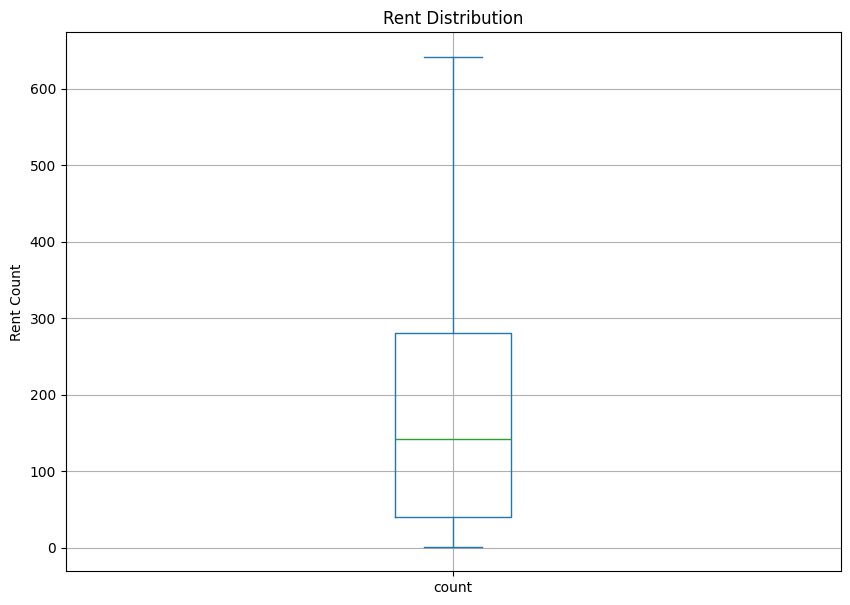

In [16]:
ax = df['count'].plot.box(
     showfliers=False,
     grid=True,
     figsize=(10,7)
)

ax.set_ylabel('Rent Count')
ax.set_title('Rent Distribution')

plt.suptitle("")
plt.show()

In [17]:
df.describe(include='all').round(2)

,datetime,year,season,month,day,hour,workday,weather,temperature,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379,17379.00,17379,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
unique,NaN,2,4,12,7,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012,Fall,Jul,Saturday,NaN,Workday,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8734,4496,1488,2512,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 15:41:22.858622464,NaN,NaN,NaN,NaN,11.55,NaN,NaN,0.50,0.63,0.22,35.68,153.79,189.46
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.02,0.08,0.09,0.00,0.00,1.00
25%,2011-07-04 22:30:00,NaN,NaN,NaN,NaN,6.00,NaN,NaN,0.34,0.48,0.13,4.00,34.00,40.00
50%,2012-01-02 21:00:00,NaN,NaN,NaN,NaN,12.00,NaN,NaN,0.50,0.63,0.22,17.00,115.00,142.00
75%,2012-07-02 06:30:00,NaN,NaN,NaN,NaN,18.00,NaN,NaN,0.66,0.78,0.25,48.00,220.00,281.00
max,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,23.00,NaN,NaN,1.00,1.00,0.85,367.00,886.00,977.00


- Melihat total penyewaan sepeda berdasarkan tahun data diambil

In [18]:
year_count = df.groupby(by="year").agg({
    "count": ["sum"]
})
year_count

,count
,sum
year,
2011,1243103
2012,2049576


- Melihat total penyewaan sepeda berdasarkan hari kerja dan hari libur

In [19]:
workday_count = df.groupby(by="workday").agg({
    "count": ["sum"]
})
workday_count

,count
,sum
workday,
Holiday,1000269
Workday,2292410


- Melihat total penyewaan sepeda berdasarkan jam

In [20]:
hour_count = df.groupby(by="hour").agg({
    "count": ["sum"]
})
hour_count

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


- Melihat total penyewaan sepeda berdasarkan jam pada hari kerja 

In [21]:
workhour = df[df['workday'] == 'Workday']

workday_hour_count = workhour.groupby(by="hour").agg({
    "count": ["sum"]
})
workday_hour_count

,count
,sum
hour,
0,18246
1,8177
2,4229
3,2323
4,2552
5,12332
6,50840
7,144144


- Melihat total penyewaan sepeda berdasarkan jam pada hari libur

In [22]:
offhour = df[df['workday'] == 'Holiday']

offday_hour_count = offhour.groupby(by="hour").agg({
    "count": ["sum"]
})
offday_hour_count

,count
,sum
hour,
0,20884
1,15987
2,12123
3,5851
4,1876
5,1929
6,4292
7,10027


- Melihat total penyewaan sepeda berdasarkan musim

In [23]:
season_count = df.groupby(by="season").agg({
    "count": ["sum"]
})
season_count

,count
,sum
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


- Melihat total penyewaan sepeda berdasarkan cuaca

In [24]:
weather_count = df.groupby(by="weather").agg({
    "count": ["sum"]
})
weather_count

,count
,sum
weather,
Clear,2338173
Cloudy,795952
Rainy,158331
Stormy,223


### Insights

- Pola penyewaan sepeda meningkat pada jam kerja di hari kerja (07:00-09:00 dan 16:00-19:00) dan pola penyewaan yang cenderung stabil sepanjang hari pada hari libur
- Pola penyewaan sepeda sangat bergantung pada kondisi cuaca, sehingga ikut berpengaruh pada jumlah penyewaan pada musim tertentu 

## Visualization & Explanatory Analysis

### 1.0 Bagaimana Performa Penjualan dari Waktu ke Waktu

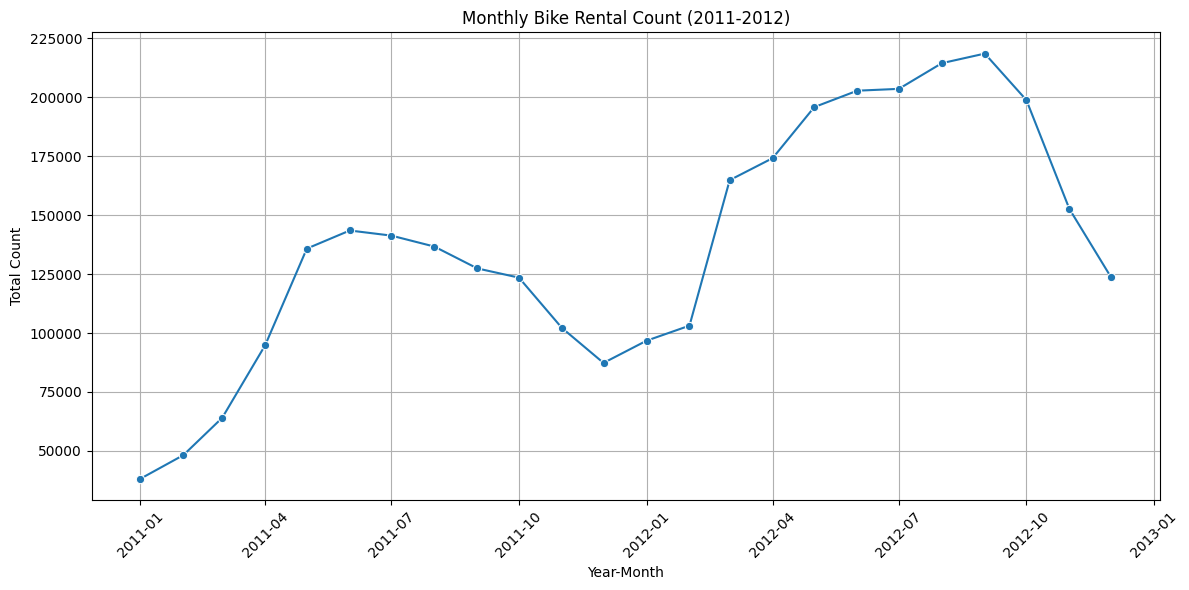

In [25]:
df['month'] = df['month'].astype(str) 
monthly_sum = df.groupby(['year', 'month'])['count'].sum().reset_index()

monthly_sum['year_month'] = monthly_sum['year'].astype(str) + '-' + monthly_sum['month']
monthly_sum['year_month'] = pd.to_datetime(monthly_sum['year_month'], format='%Y-%b')
monthly_sum = monthly_sum.sort_values('year_month')

plt.figure(figsize=(12, 6))
sb.lineplot(data=monthly_sum, x='year_month', y='count', marker='o')
plt.title('Monthly Bike Rental Count (2011-2012)')
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


         2011    2012  growth (%)
month                            
Apr     94870  174224   83.644988
Aug    136691  214503   56.925474
Dec     87323  123713   41.672870
Feb     48215  103137  113.910609
Jan     38189   96744  153.329493
Jul    141341  203607   44.053742
Jun    143512  202830   41.333129
Mar     64045  164875  157.436178
May    135821  195865   44.208186
Nov    102167  152664   49.425940
Oct    123511  198841   60.990519
Sep    127418  218573   71.540128


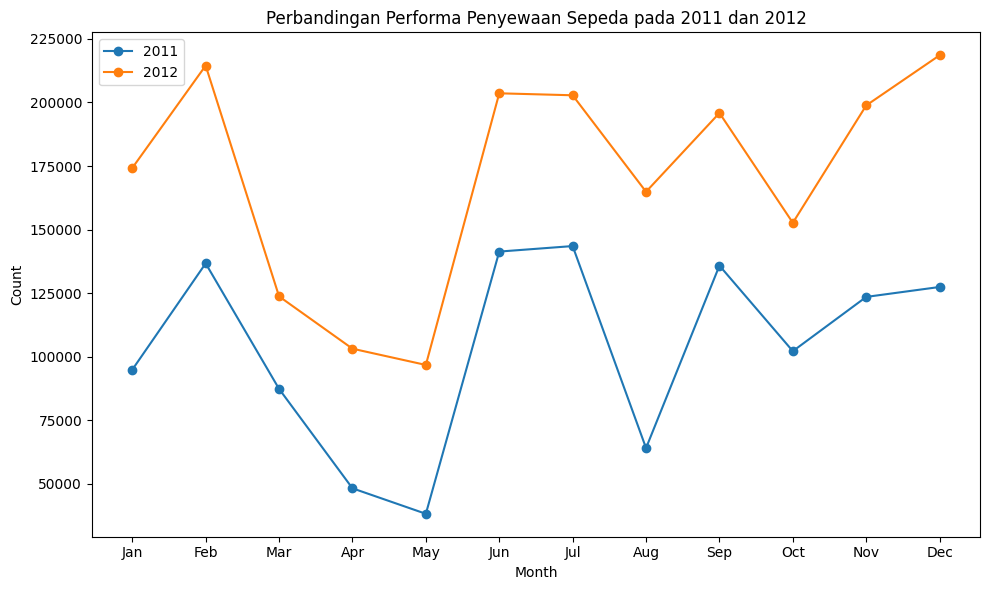

In [26]:
monthly_data = df.groupby(['year', 'month'])['count'].sum().reset_index()

monthly_pivot = monthly_data.pivot(index='month', columns='year', values='count')
monthly_pivot.columns = ['2011', '2012']
monthly_pivot = monthly_pivot.sort_index()
monthly_pivot['growth (%)'] = ((monthly_pivot['2012'] - monthly_pivot['2011']) / monthly_pivot['2011']) * 100
print(monthly_pivot)

plt.figure(figsize=(10,6))

plt.plot(monthly_pivot.index, monthly_pivot['2011'], marker='o', label='2011')
plt.plot(monthly_pivot.index, monthly_pivot['2012'], marker='o', label='2012')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Perbandingan Performa Penyewaan Sepeda pada 2011 dan 2012')
plt.xticks(monthly_pivot.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.tight_layout()
plt.show()

#### Insight
- Total penyewaan sepeda cenderung meningkat pada tahun 2012 dibandingkan dengan tahun sebelumnya
- Terdapat pola naik dan turun setiap tahun, yang kemungkinan dipengaruhi oleh musim (heads up: pertanyaan 3) 

### 2.0 Bagaimana perbandingan performa penyewaan sepeda antara hari kerja dan hari libur?


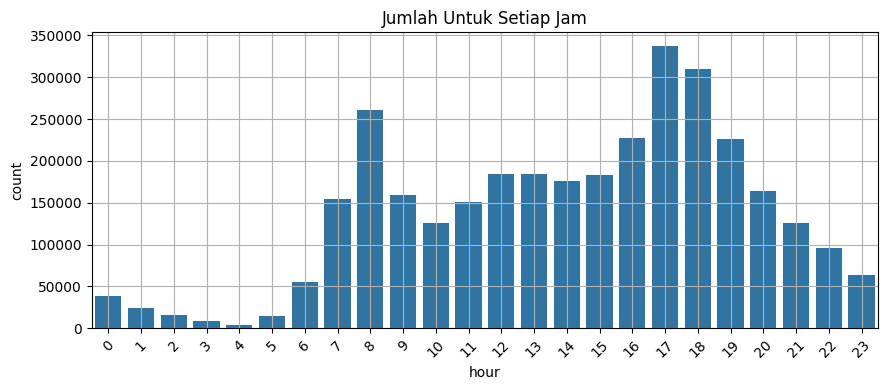

In [27]:
hourly_sum = df.groupby('hour')['count'].sum().reset_index()
plt.figure(figsize=(25, 4))
plt.subplot(1, 3, 1)
sb.barplot(x='hour', y='count', data=hourly_sum)
plt.title('Jumlah Untuk Setiap Jam')
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()

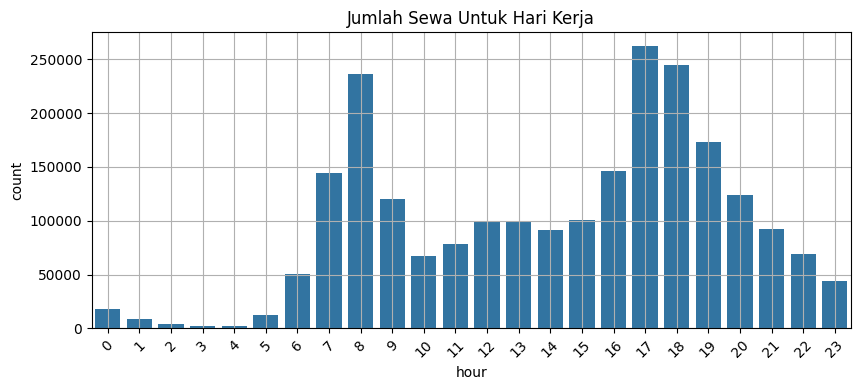

In [28]:
workday_data = df[df['workday'] == 'Workday']
hourly_sum_workday = workday_data.groupby('hour')['count'].sum().reset_index()
plt.figure(figsize=(25, 4))
plt.subplot(1, 3, 2)
sb.barplot(x='hour', y='count', data=hourly_sum_workday)
plt.title('Jumlah Sewa Untuk Hari Kerja')
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()


#### Insight
- Performa penyewaan sepeda meningkat mulai dari jam kerja dan menurun menjelang malam hari

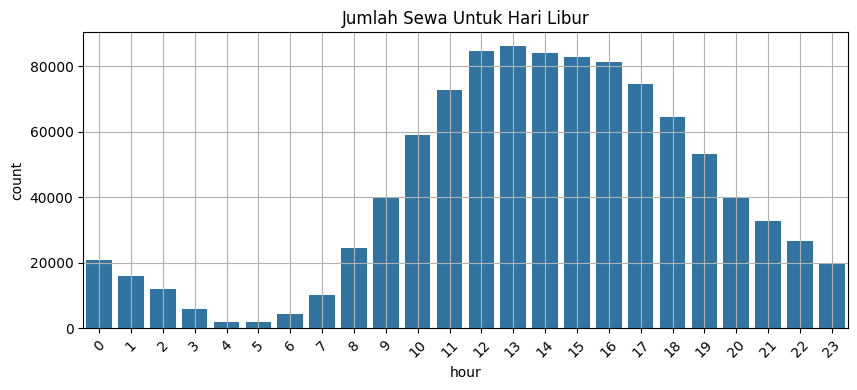

In [29]:
holiday_data = df[df['workday'] == 'Holiday']
hourly_sum_holiday = holiday_data.groupby('hour')['count'].sum().reset_index()
plt.figure(figsize=(25, 4))
plt.subplot(1, 3, 2)
sb.barplot(x='hour', y='count', data=hourly_sum_holiday)
plt.title('Jumlah Sewa Untuk Hari Libur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

#### Insight
- Sedangkan hari libur memiliki distribusi yang cukup merata jika mengecualikan sebagian jam, menggambarkan waktu tidur normal dan menunjukkan sedikitnya aktifitas setelah melewati tengah malam

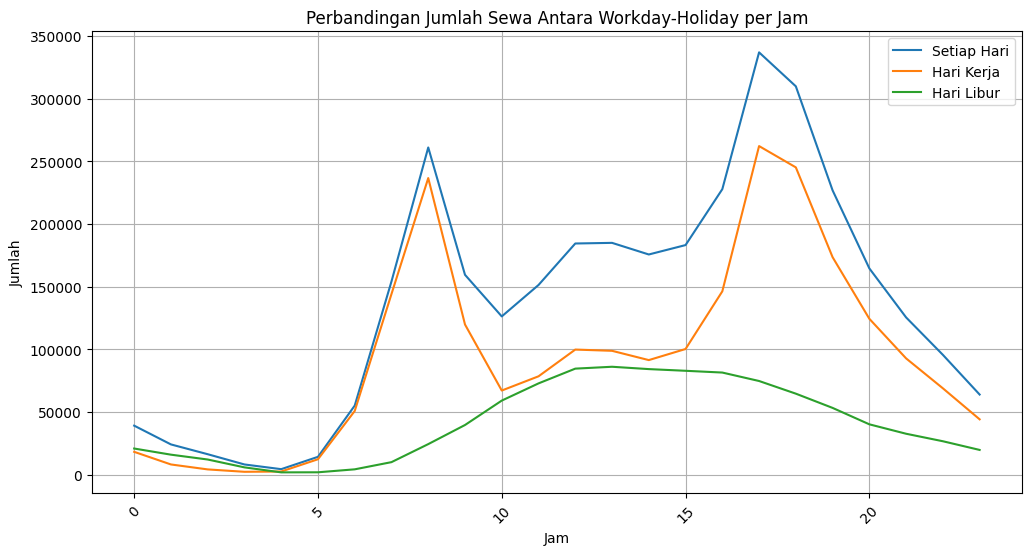

In [30]:
combined_data = hourly_sum.copy()
combined_data['Workday'] = hourly_sum_workday['count']
combined_data['Holiday'] = hourly_sum_holiday['count']

plt.figure(figsize=(12, 6))
sb.lineplot(x='hour', y='count', data=combined_data, label='Setiap Hari')
sb.lineplot(x='hour', y='Workday', data=combined_data, label='Hari Kerja')
sb.lineplot(x='hour', y='Holiday', data=combined_data, label='Hari Libur')

plt.title('Perbandingan Jumlah Sewa Antara Workday-Holiday per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


#### Insight
- Dari graf untuk hari kerja, menunjukkan aktifitas sekolah dan kantor yang sangat mempengaruhi meningkatnya jumlah penyewaan sepeda
- Graf hari libur menunjukkan fluktuasi yang cukup normal dalam jumlah penyewaan sepeda, yang disebabkan kurangnya urgensi bepergian pada jam tertentu

### 2.1 Jam berapakah puncak penyewaan sepeda terjadi di hari kerja?

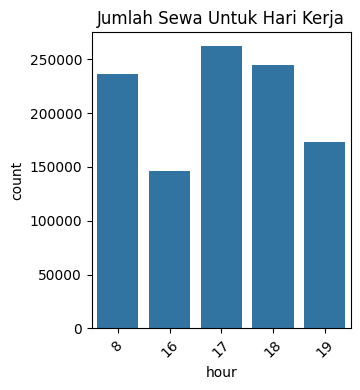

In [31]:
workday_data = df[df['workday'] == 'Workday']
hourly_sum_workday = workday_data.groupby('hour')['count'].sum().reset_index()

highest_hours_workday = hourly_sum_workday.sort_values(by='count', ascending=False).head(5)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 2)
sb.barplot(x='hour', y='count', data=highest_hours_workday)
plt.title('Jumlah Sewa Untuk Hari Kerja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insight
- Seperti yang telah diprediksi, pukul 08:00 saat jam masuk kerja dan rentang antara pukul 16:00-19:00 saat jam pulang kerja 

### 3.0 Bagaimana performa penyewaan sepeda berdasarkan musim? 

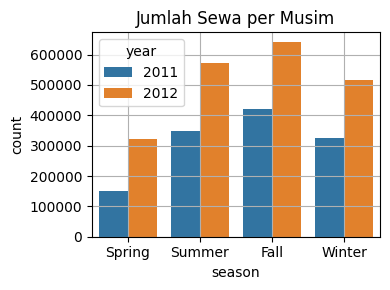

In [32]:
seasonal_sum = df.groupby(['year', 'season'])['count'].sum().reset_index()
plt.figure(figsize=(4, 3))
sb.barplot(x='season', y='count', hue='year', data=seasonal_sum)
plt.title('Jumlah Sewa per Musim')
plt.xlabel('season')
plt.ylabel('count')

plt.tight_layout()
plt.grid(True)
plt.show()

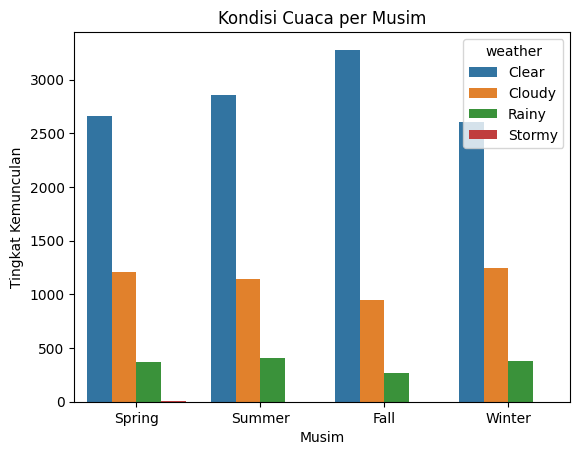

In [33]:
weather_per_season = df.groupby(['season', 'weather']).size().reset_index(name='count')

sb.barplot(x='season', y='count', hue='weather', data=weather_per_season)

# Add labels and title
plt.xlabel('Musim')
plt.ylabel('Tingkat Kemunculan')
plt.title('Kondisi Cuaca per Musim')
plt.show()

#### Insight 
- Seperti yang terlihat pada pertanyaan 1.0, musim sangat mempengaruhi performa penyewaan sepeda, seperti musim seperti summer dan fall yang mayoritas memiliki cuaca cerah menyebabkan jumlah sewa yang meningkat. 

### 3.1 Apakah kondisi cuaca mempengaruhi?

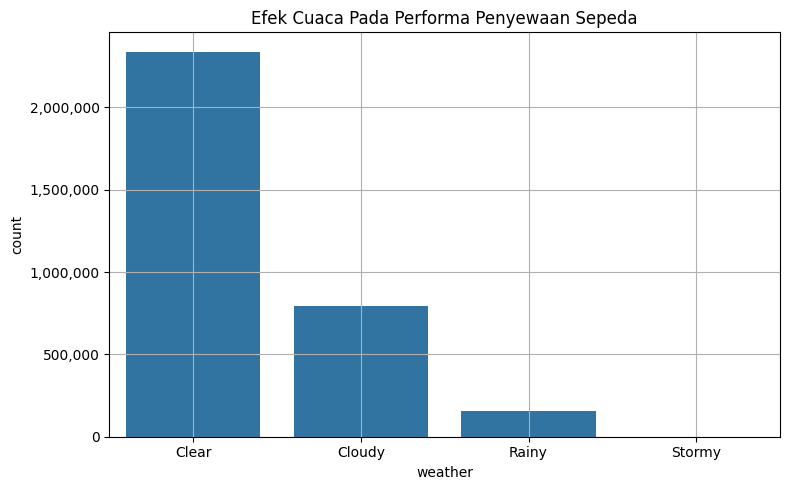

In [34]:
weather_sum = df.groupby('weather')['count'].sum().reset_index()

plt.figure(figsize=(8, 5))
sb.barplot(x='weather', y='count', data=weather_sum)
plt.title('Efek Cuaca Pada Performa Penyewaan Sepeda')
plt.xlabel('weather')
plt.ylabel('count')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)

plt.tight_layout()
plt.show()

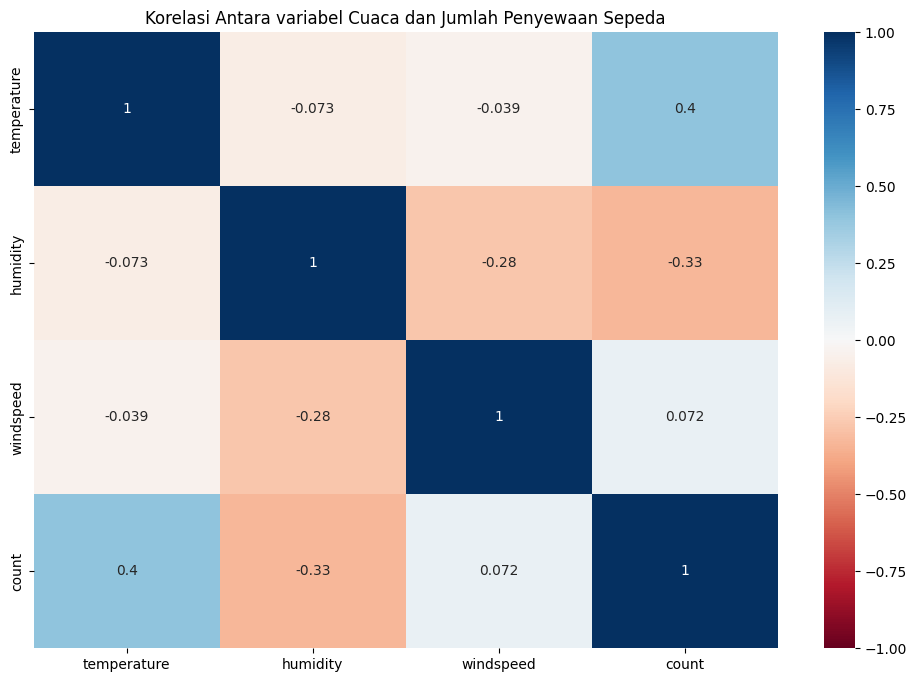

In [35]:
numerical_columns = ['temperature', 'humidity', 'windspeed', 'count']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Korelasi Antara variabel Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()

#### Insight
- Melanjutkan pertanyaan 3.0, kondisi cuaca terutama secara spesifik mengacu pada beberapa faktor seperti temperatur, kelembapan, dan kecepatan angin.
- Dilihat dari tabel korelasi, temperatur cukup mempengaruhi pilihan untuk menyewa sepeda. Temperatur yang dingin cenderung membuat orang untuk menggunakan mobil atau tranportasi umum lainnya.
- Sedangkan kelembapan dan kecepatan angin kurang berpengaruh pada performa penyewaan sepeda. Hal ini mungkin disebabkan oleh kurangnya kondisi ekstrim yang tercatat pada dataframe ini. 

## Conclusion

- Pertanyaan 1.0: Performa penyewaan meningkat signifikan dimana persentase jumlah sewa terendah berada pada +41% dan tertinggi mencapai +157%.

- Pertanyaan 2.0: Terdapat pola yang menunjukan lonjakan pada jam kerja, dan pola yang merata pada hari libur.
- Pertanyaan 2.1: Penyewaan sepeda meningkat pada pukul 08:00 pada waktu berangkat kerja, dan kembali meningkat pada pukul 17:00 disaat pulang dari tempat kerja.

- Pertanyaan 3.0: Terdapat pola yang konsisten pada dataframe yang digunakan, dimana musim dengan cuaca yang berubah-ubah seperti winter memiliki jumlah penyewa yang lebih sedikit, dan berangsur-angsur meningkat saat memasuki spring, lalu memuncak pada summer dan fall, yang kemudian kembali lagi pada pola yang sama.
- Pertanyaan 3.1: Kondisi seperti suhu/temperatur sangat mempengaruhi performa penyewaan sepeda, sedangkan variabel seperti kelembapan dan kecepatan angin tidak terlalu berpengaruh pada data ini. (Kemungkinan disebabkan oleh value yang merata dan tanpa fluktuasi signifikan)